In [1]:
import numpy as np
from climada.hazard import TCTracks
import warnings # To hide the warnings
warnings.filterwarnings('ignore')

tracks = TCTracks.from_ibtracs_netcdf(provider='usa', basin='NA')
# Here we download the full dataset for the analysis
# afterwards (e.g. return period), but you can also use "year_range" to adjust the range of the dataset to be downloaded.
# While doing that, you need to make sure that the year 2017 is included if you want to run the blocks with the codes
# subsetting a specific tropic cyclone, which happened in 2017. (Of course, you can also change the subsetting codes.)

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 8.0.0. Please consider upgrading.
  warnings.warn(
IBTrACS.ALL.v04r00.nc: 26.8MB [00:09, 2.93MB/s]                              


2024-02-15 09:59:02,367 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /Users/arnaudgoussebaile/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2024-02-15 09:59:09,614 - climada.hazard.tc_tracks - WARNING - 1118 storm events are discarded because no valid wind/pressure values have been found: 1851175N26270, 1851181N19275, 1851187N22262, 1851192N12300, 1851214N14321, ...
2024-02-15 09:59:09,637 - climada.hazard.tc_tracks - WARNING - 140 storm events are discarded because only one valid timestep has been found: 1852232N21293, 1853242N12336, 1855236N12304, 1856221N25277, 1856235N13302, ...


2024-02-15 10:01:31,647 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /Users/arnaudgoussebaile/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


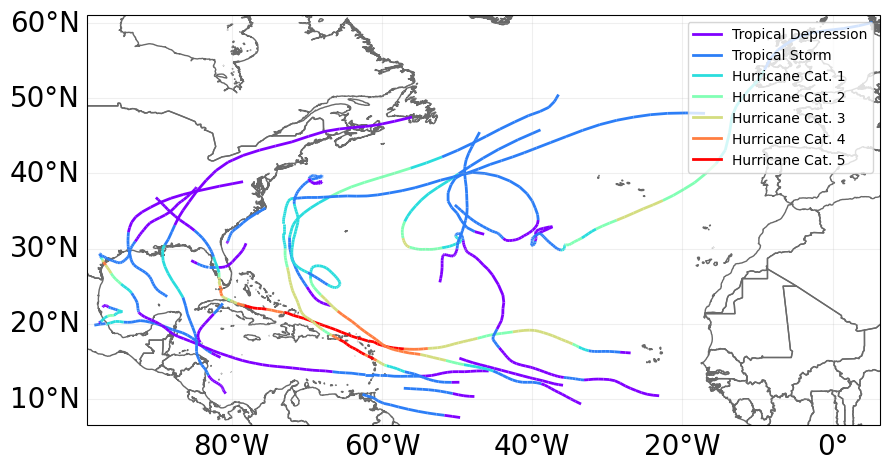

In [2]:
# plotting tracks can be very time consuming, depending on the number of tracks. So we choose only a few here, by limiting the time range to one year
tracks_2017 = TCTracks.from_ibtracs_netcdf(provider='usa', basin='NA', year_range = (2017, 2017))
tracks_2017 .plot(); # This may take a very long time

In [3]:
tracks.equal_timestep(time_step_h=0.5)

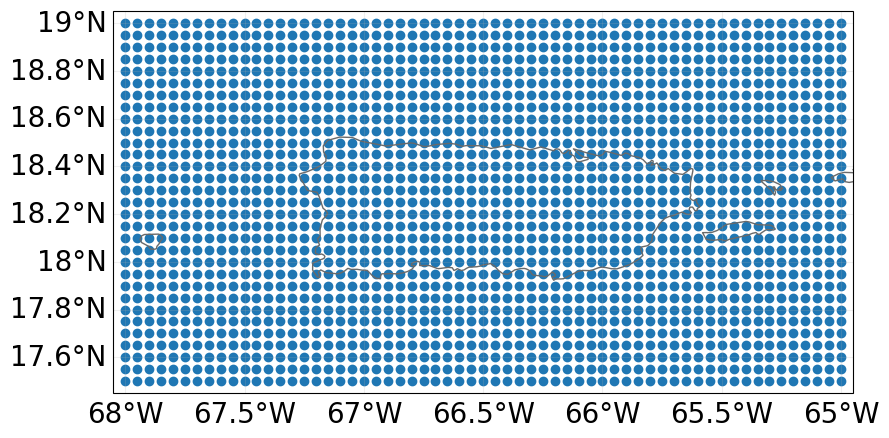

In [4]:
from climada.hazard import Centroids

min_lat, max_lat, min_lon, max_lon = 17.5, 19.0, -68.0, -65.0
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.05)
cent.check()
cent.plot();

In [8]:
from climada.hazard import TropCyclone

haz = TropCyclone.from_tracks(tracks, centroids=cent)
haz.check()

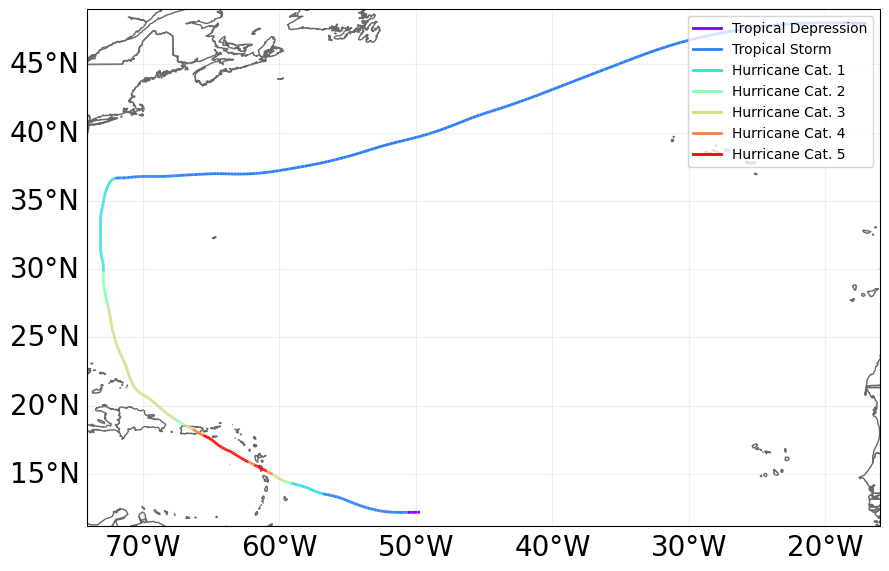

In [9]:
tracks.subset({"sid": "2017260N12310"}).plot();  # This is how we subset a TCTracks object

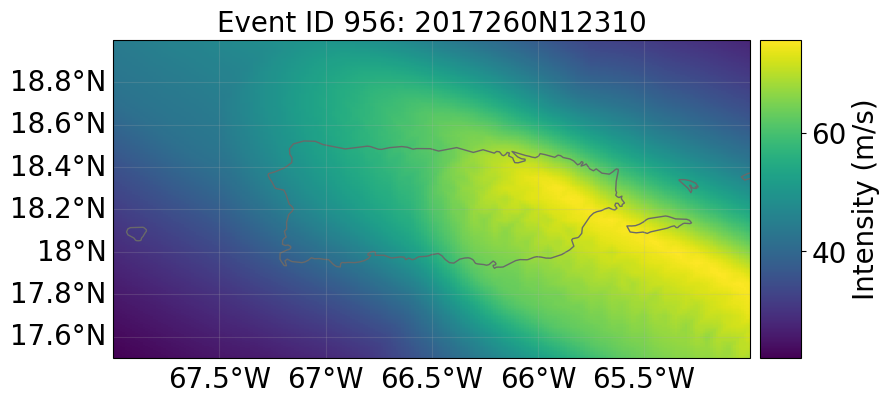

In [10]:
haz.plot_intensity(event='2017260N12310');

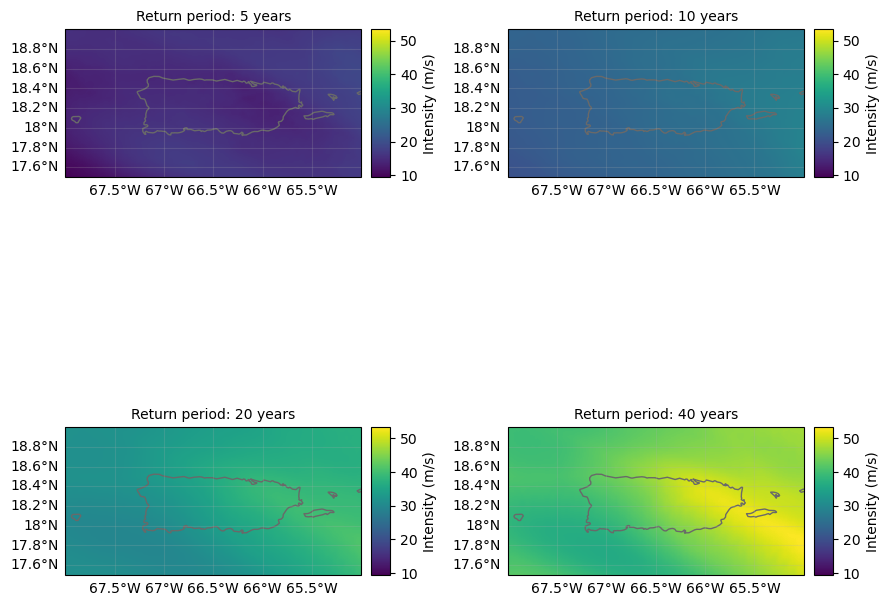

In [11]:
haz.plot_rp_intensity(return_periods=(5,10,20,40));

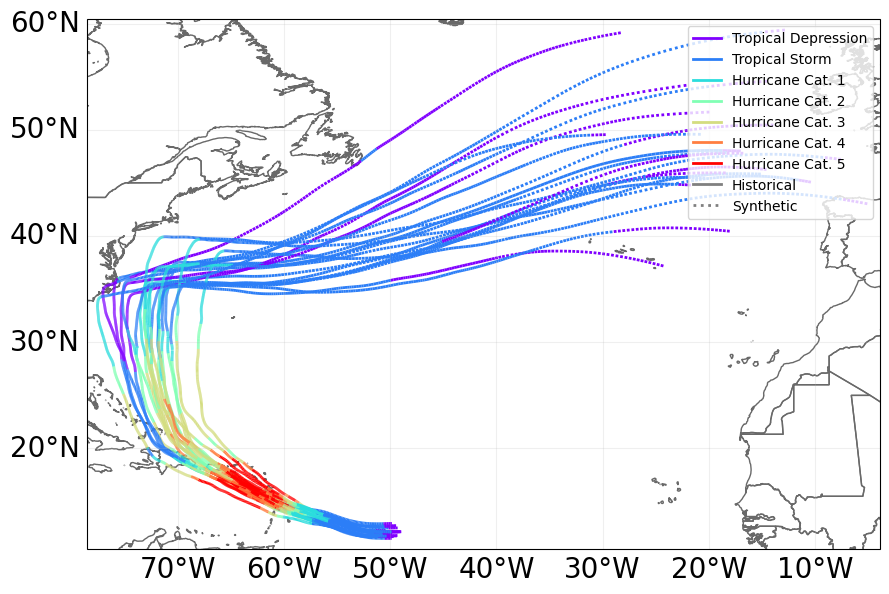

In [16]:
track_maria = tracks.subset({"sid": "2017260N12310"})
track_maria.calc_perturbed_trajectories(nb_synth_tracks=20)
track_maria.plot();

In [19]:
tc_maria = TropCyclone.from_tracks(track_maria, centroids=cent)
tc_maria.check()

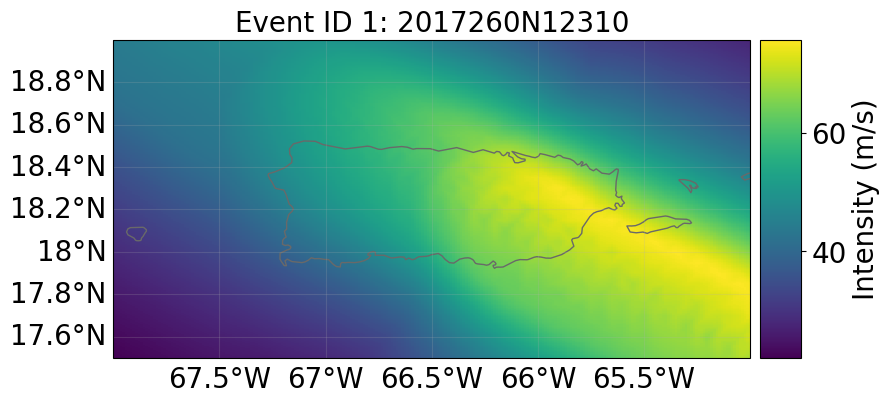

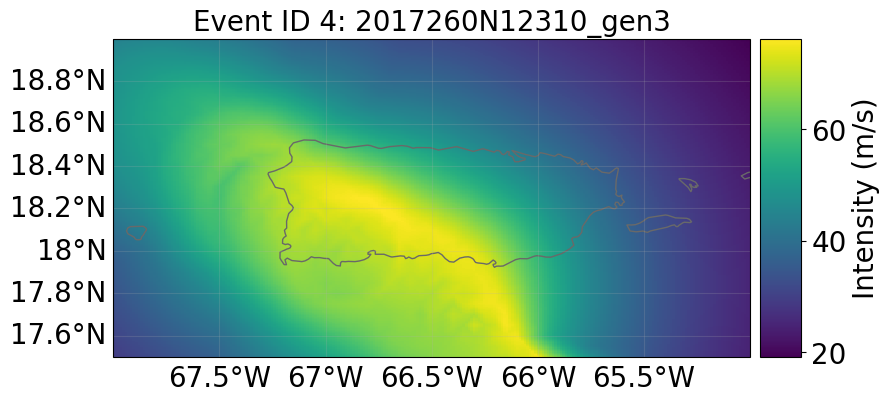

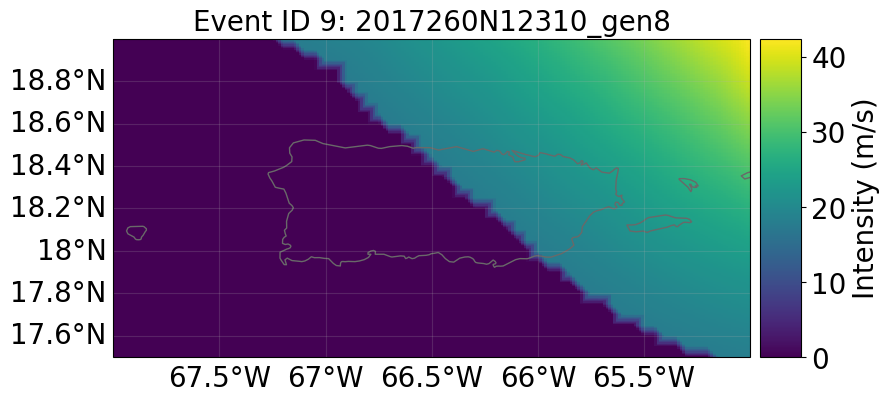

In [22]:
tc_maria.plot_intensity(event='2017260N12310');
tc_maria.plot_intensity(event='2017260N12310_gen3');
tc_maria.plot_intensity(event='2017260N12310_gen8');

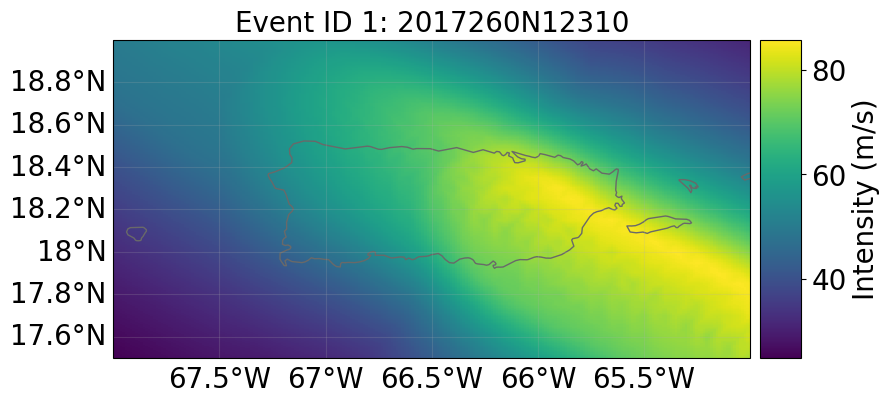

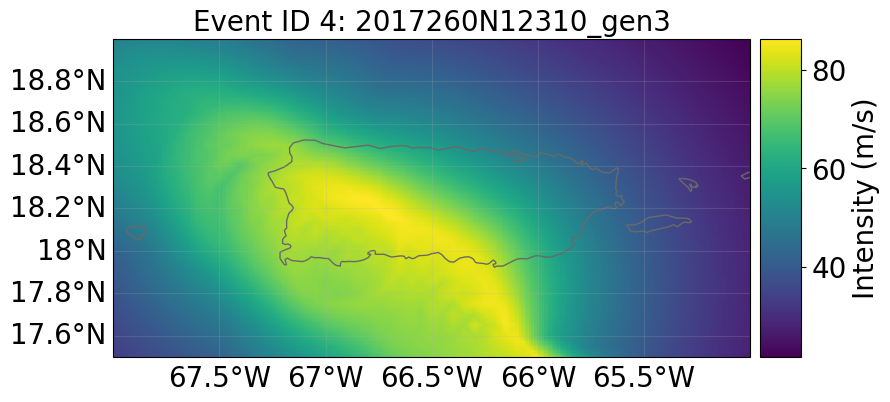

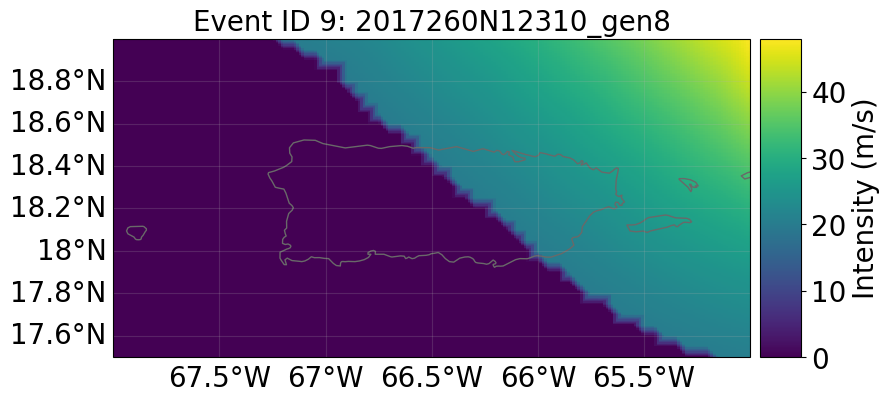

In [30]:
tc_maria_cc = tc_maria.apply_climate_scenario_knu(ref_year=2100, rcp_scenario=85)
tc_maria_cc.plot_intensity(event='2017260N12310');
tc_maria_cc.plot_intensity(event='2017260N12310_gen3');
tc_maria_cc.plot_intensity(event='2017260N12310_gen8');

In [28]:
import inspect
inspect.getmembers(TropCyclone)

[('__class__', type),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': 'climada.hazard.trop_cyclone',
                '__doc__': "\n    Contains tropical cyclone events.\n\n    Attributes\n    ----------\n    category : np.ndarray of ints\n        for every event, the TC category using the Saffir-Simpson scale:\n\n        * -1 tropical depression\n        *  0 tropical storm\n        *  1 Hurrican category 1\n        *  2 Hurrican category 2\n        *  3 Hurrican category 3\n        *  4 Hurrican category 4\n        *  5 Hurrican category 5\n    basin : list of str\n        Basin where every event starts:\n\n        * 'NA' North Atlantic\n        * 'EP' Eastern North Pacific\n        * 'WP' Western North Pacific\n        * 'NI' North Indian\n        * 'SI' South Indian\n        * 'SP' Southern Pacific\n        * 'SA' South Atlantic\n    windfields : list of csr_matrix\n        For each event, the full velocity vectors at e

26.8kKB [00:04, 6.51kKB/s]                           


2024-02-15 12:40:30,644 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-02-15 12:40:30,693 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-02-15 12:40:30,825 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020


1.44kKB [00:00, 12.5kKB/s]                           


2024-02-15 12:40:32,607 - climada.util.finance - WARNING - No data available for country. Using non-financial wealth instead
2024-02-15 12:40:33,559 - climada.util.finance - WARNING - No data for country, using mean factor.


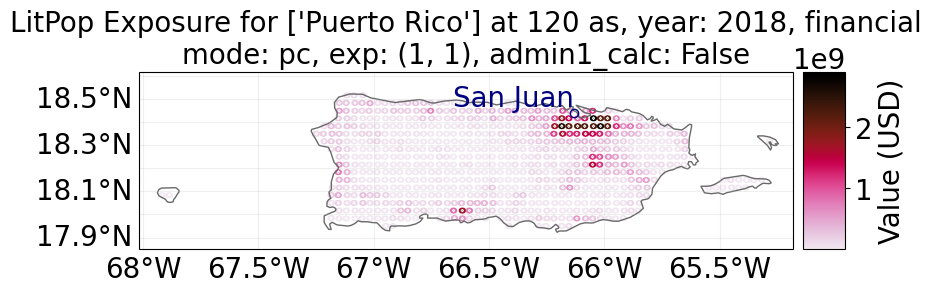

In [32]:
from climada.entity.exposures import LitPop

exp_litpop = LitPop.from_countries('Puerto Rico', res_arcsec = 120)  # We'll go lower resolution than default to keep it simple
exp_litpop.set_geometry_points() # Set geodataframe geometries from lat lon data

exp_litpop.plot_hexbin(pop_name=True, linewidth=4, buffer=0.1);

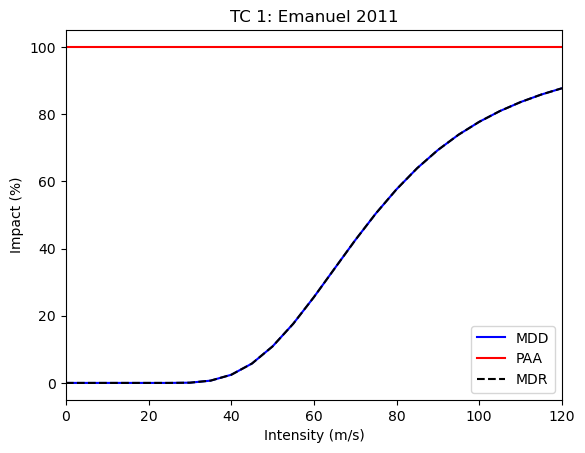

In [33]:
from climada.entity.impact_funcs import ImpactFuncSet, ImpfTropCyclone

imp_fun = ImpfTropCyclone.from_emanuel_usa()
imp_fun.plot();

In [34]:
imp_fun_set = ImpactFuncSet([imp_fun])

In [35]:
exp_litpop.gdf['impf_TC'] = 1

In [36]:
exp_litpop.gdf

,value,latitude,longitude,geometry,region_id,impf_,impf_TC
0,5.807070e+01,18.083333,-67.916667,POINT (-67.91667 18.08333),630,1,1
1,9.836909e+01,18.083333,-67.883333,POINT (-67.88333 18.08333),630,1,1
2,9.375185e+05,18.150000,-65.483333,POINT (-65.48333 18.15000),630,1,1
3,7.797560e+07,18.150000,-65.450000,POINT (-65.45000 18.15000),630,1,1
4,1.324154e+07,18.150000,-65.416667,POINT (-65.41667 18.15000),630,1,1
...,...,...,...,...,...,...,...
686,3.295975e+07,17.950000,-66.283333,POINT (-66.28333 17.95000),630,1,1
687,2.404646e+07,17.950000,-66.250000,POINT (-66.25000 17.95000),630,1,1
688,4.903164e+07,17.950000,-66.183333,POINT (-66.18333 17.95000),630,1,1
689,9.947122e+07,17.950000,-66.150000,POINT (-66.15000 17.95000),630,1,1


In [37]:
from climada.entity import Entity

ent = Entity(
    exposures=exp_litpop,
    impact_func_set=imp_fun_set
)

In [38]:
from climada.engine import ImpactCalc

imp = ImpactCalc(ent.exposures, ent.impact_funcs, haz).impact()

Expected average annual impact: 9.414e+08 USD


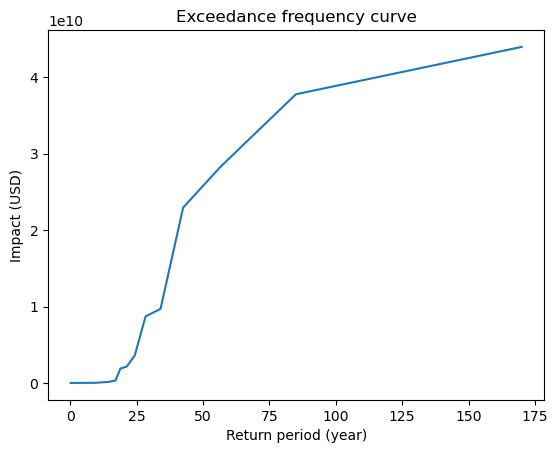

In [39]:
freq_curve = imp.calc_freq_curve() # impact exceedance frequency curve
freq_curve.plot();

print('Expected average annual impact: {:.3e} USD'.format(imp.aai_agg))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x16b8b84a0>

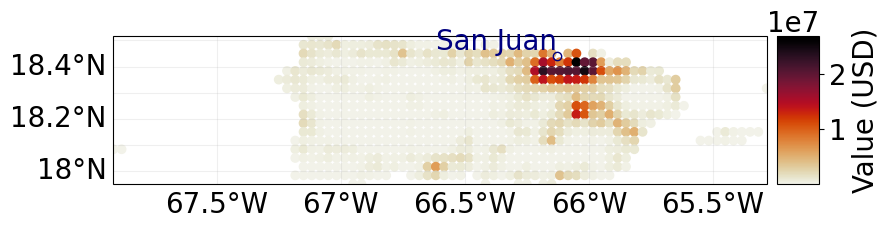

In [60]:
imp.plot_basemap_eai_exposure(buffer=0.0); # average annual impact at each exposure

In [43]:
from climada.engine import ImpactCalc

imp_events = ImpactCalc(ent.exposures, ent.impact_funcs, haz).impact(save_mat=True)

In [57]:
maria_id = imp_events.event_name.index('2017260N12310') + 1
maria_id

956

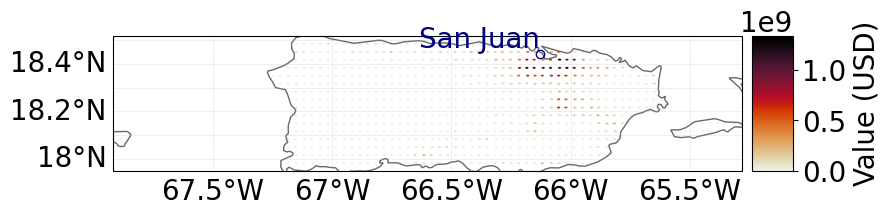

In [59]:
imp_events.plot_hexbin_impact_exposure(event_id=maria_id, buffer=0.0);

In [61]:
import os
from climada.util import save, load

### Uncomment this to save - saves by default to ./results/
save('impact_puerto_rico_tc.p', imp)

In [62]:
### Uncomment this to read the saved data:
abs_path = os.path.join(os.getcwd(), 'results/impact_puerto_rico_tc.p')
data = load(abs_path)

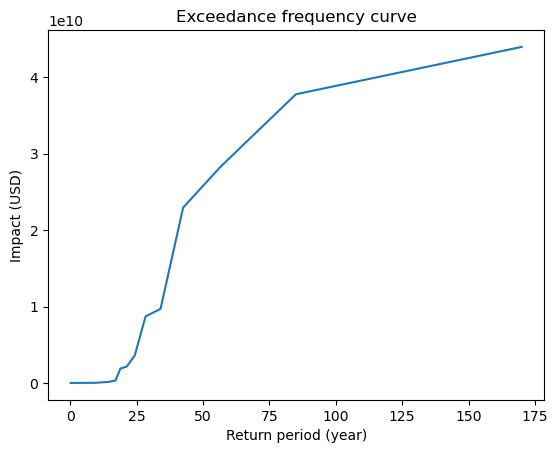

In [63]:
freq_curve2 = data.calc_freq_curve() # impact exceedance frequency curve
freq_curve2.plot();